# KLASIFIKASI OBAT

Sumber Data : https://github.com/MuhammadAuliaa/KNN_KlasifikasiObat/blob/main/drug200.csv

Atribut Data :

age = usia

sex = jenis kelamin

BP = tekanan darah

cholesterol = tingkat kolesterol

Na_to_K = potasium

drug = jenis obat (label)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.shape

(200, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df.Drug.value_counts()

,count
Drug,
DrugY,91
drugX,54
drugA,23
drugC,16
drugB,16


In [ ]:
df.Sex.value_counts()

,count
Sex,
M,104
F,96


<Axes: xlabel='Age', ylabel='Count'>

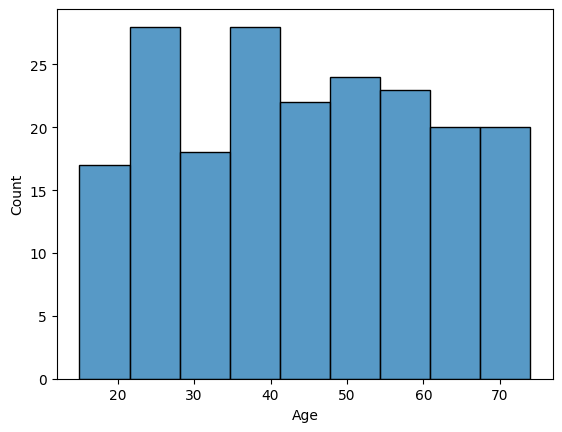

In [ ]:
sns.histplot(df['Age'])

Dari histogram menunjukkan bahwa dataset berisi rentang usia antara 15 hingga 75. Frekuensi kemunculan usia paling banyak dalam dataset antara rentang 20 hingga 30 dan rentang 35 dan 40

In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


Tidak ada data yang kosong

In [ ]:
df.duplicated().sum()

0

Tidak ada data duplikasi

<ipython-input-20-ba7af94c14c7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Drug', data=df, palette='pastel')


Text(0, 0.5, 'Jenis Obat')

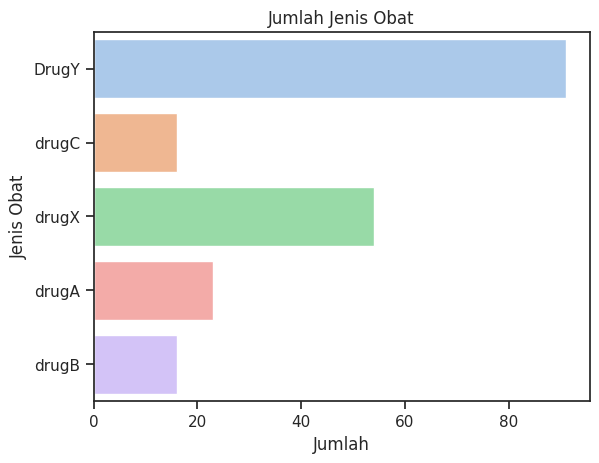

In [ ]:
sns.set_theme(style='ticks')
sns.countplot(y='Drug', data=df, palette='pastel')
plt.title('Jumlah Jenis Obat')
plt.xlabel('Jumlah')
plt.ylabel('Jenis Obat')

Jumlah jenis obat tertinggi adalah obat Y dan jenis obat terendah adalah obat B

<ipython-input-21-8b02121a89a2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='rocket')


Text(0, 0.5, 'Jumlah')

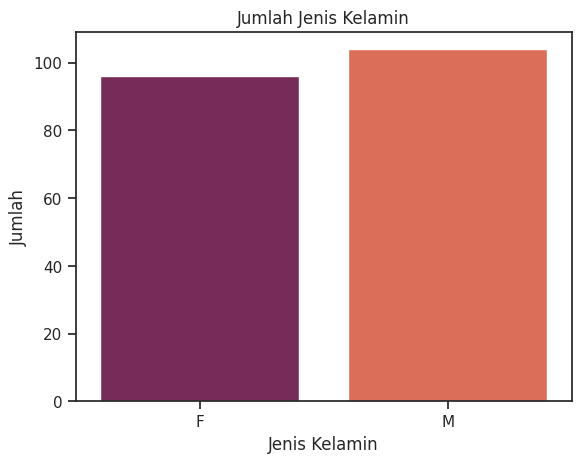

In [ ]:
sns.set_theme(style='ticks')
sns.countplot(x='Sex', data=df, palette='rocket')
plt.title('Jumlah Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')

Jenis kelamin Laki-laki atau male lebih tinggi dari perempuan atau female

In [ ]:
#Mengubah tipe data string ke integer dengan label encoder

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['BP'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])
df['Drug'] = label_encoder.fit_transform(df['Drug'])

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [ ]:
x = df.drop(columns = ['Drug'])
y = df['Drug']

print('x :', x.shape)
print('y :', y.shape)

x : (200, 5)
y : (200,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(f'x_train : {x_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_train : {y_train.shape}')
print(f'y_test : {y_test.shape}')

x_train : (160, 5)
x_test : (40, 5)
y_train : (160,)
y_test : (40,)


In [ ]:
knn =KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test) #prediksi model
knn_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print('Akurasi KNN : {:.2f}%'.format(knn_acc*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.56      0.83      0.67         6
           2       0.50      0.67      0.57         3
           3       1.00      0.20      0.33         5
           4       0.73      0.73      0.73        11

    accuracy                           0.78        40
   macro avg       0.76      0.69      0.66        40
weighted avg       0.82      0.78      0.76        40

Akurasi KNN : 77.50%


In [ ]:
testing = {'Age': [35],
           'Sex': [1],
           'BP': [2],
           'Cholesterol': [0],
           'Na_to_K': [4.5]
           }

testing = pd.DataFrame(testing)
testing

,Age,Sex,BP,Cholesterol,Na_to_K
0,35,1,2,0,4.5


In [ ]:
pred = knn.predict(testing)
print('Hasil prediksi dari data pasien baru')
print(pred)

Hasil prediksi dari data pasien baru
[4]


Jenis obat yang direkomendasikan dari data baru adalah jenis obat X